# Canada Covid Alert App

When the Canadian government released the contact tracing CovidAlert app for mobile phones I thought it was a great idea to help with contact tracing.  The idea being that you would get alerted if you came in contact with someone who was infected so that you could self isolate before the onset of symptoms.  In theory this would all help limit the spread.

Unfortunately it never took off as hoped.  This analysis will only look at downloads and what we could possibly derive from the data.

# Import the libraries

In [19]:
import pandas as pd
import matplotlib
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

## The Canadian government releases a daily dataset of Covid Alert downloads to Apple iOS and Google Android

In [20]:
df = pd.read_csv('https://data.ontario.ca/dataset/06a61019-62c1-48d8-8d4d-2267ae0f1144/resource/37cfeca2-059e-4a5f-a228-249f6ab1b771/download/covid_alert_downloads_canada.csv')

In [21]:
df.head()

,date,cumulative_ios_downloads_canada,cumulative_android_downloads_canada,cumulative_total_downloads_canada,daily_ios_downloads_canada,daily_android_downloads_canada,daily_total_downloads_canada
0,2020-07-30,189,"1,909","2,098",189,"1,909","2,098"
1,2020-07-31,"326,519","262,575","589,094","326,330","260,666","586,996"
2,2020-08-01,"630,961","386,470","1,017,431","304,442","123,895","428,337"
3,2020-08-02,"759,283","436,716","1,195,999","128,322","50,246","178,568"
4,2020-08-03,"835,095","483,562","1,318,657","75,812","46,846","122,658"


In [22]:
df.shape

(351, 7)

In [23]:
# change the data column to pandas datetime from a string object.
df['date'] = pd.to_datetime(df['date'])

In [24]:
# I am going to remove all commas from the numbers in the dataframe so that 
# I can easily change their type to integers.
df.replace(',','', regex=True, inplace=True)

In [25]:
df[['cumulative_ios_downloads_canada',
       'cumulative_android_downloads_canada',
       'cumulative_total_downloads_canada', 'daily_ios_downloads_canada',
       'daily_android_downloads_canada', 'daily_total_downloads_canada']] = df[['cumulative_ios_downloads_canada',
       'cumulative_android_downloads_canada',
       'cumulative_total_downloads_canada', 'daily_ios_downloads_canada',
       'daily_android_downloads_canada', 'daily_total_downloads_canada']].astype(int)

In [26]:
df.tail()

,date,cumulative_ios_downloads_canada,cumulative_android_downloads_canada,cumulative_total_downloads_canada,daily_ios_downloads_canada,daily_android_downloads_canada,daily_total_downloads_canada
346,2021-07-11,3805988,2789399,6595387,378,521,899
347,2021-07-12,3806468,2789988,6596456,480,589,1069
348,2021-07-13,3806950,2790663,6597613,482,675,1157
349,2021-07-14,3807346,2791153,6598499,396,490,886
350,2021-07-15,3807614,2791666,6599280,268,513,781


In [27]:
df.dtypes

date                                   datetime64[ns]
cumulative_ios_downloads_canada                 int64
cumulative_android_downloads_canada             int64
cumulative_total_downloads_canada               int64
daily_ios_downloads_canada                      int64
daily_android_downloads_canada                  int64
daily_total_downloads_canada                    int64
dtype: object

# Total daily downloads of CovidAlert App

When the application was released there was a surge of downloads.  There was a second small surge in October for some reason.

# Daily Total, Android and IOS Downloads

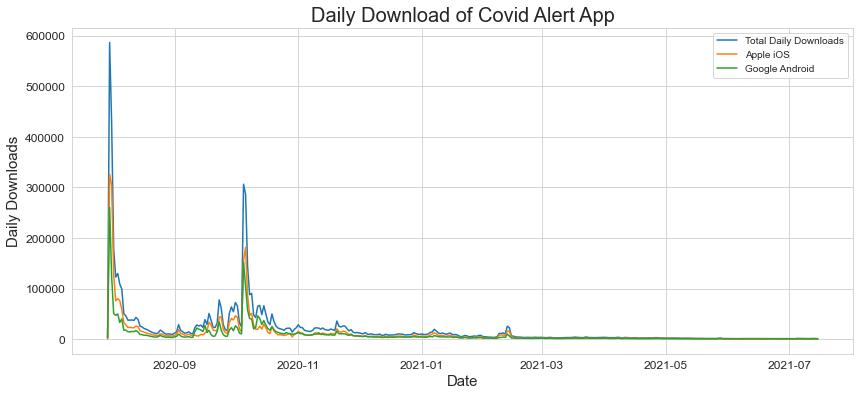

In [28]:

plt.figure(figsize=(14,6))
plt.title('Daily Download of Covid Alert App', fontsize=20)
sns.lineplot(data=df, x='date', y='daily_total_downloads_canada')
sns.lineplot(data=df, x='date', y='daily_ios_downloads_canada')
sns.lineplot(data=df, x='date', y='daily_android_downloads_canada')
plt.legend(('Total Daily Downloads','Apple iOS', 'Google Android'))
plt.ylabel('Daily Downloads', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()


I was interested in the October Spike.  Downloads spike out of nowhere on October 5 and 6.  A quick google of the covid alert app for that timeframe indicates the first day the app was released in Quebec.

https://globalnews.ca/news/7378466/quebec-coronavirus-october-5/

In [37]:
df[['date','daily_total_downloads_canada']].sort_values(by='daily_total_downloads_canada', ascending=False).head(20)

,date,daily_total_downloads_canada
1,2020-07-31,586996
2,2020-08-01,428337
67,2020-10-05,306440
68,2020-10-06,287270
3,2020-08-02,178568
69,2020-10-07,143955
5,2020-08-04,129862
4,2020-08-03,122658
6,2020-08-05,108852
7,2020-08-06,99268


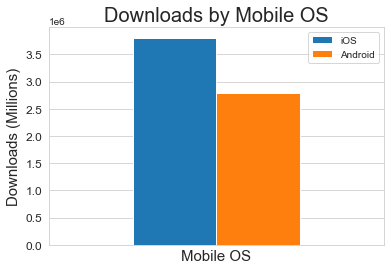

In [30]:
df[['cumulative_ios_downloads_canada', 'cumulative_android_downloads_canada']].tail(1).plot(kind='bar')
plt.title('Downloads by Mobile OS', fontsize=20)
plt.xlabel('Mobile OS', fontsize=15)
plt.ylabel('Downloads (Millions)', fontsize=15)
plt.xticks(ticks=[])
plt.yticks(fontsize=12)
plt.legend(('iOS', 'Android'))
plt.show()

## Smartphone Penetration Rate in Canada in 2018

88.1% of Canadians have a smartphone

Source https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2210011501

In [31]:
smart_phone_penetration = 0.881
canada_population = 38000000 # from world info meter.  rounded down.
phones_total = canada_population * smart_phone_penetration
print('Total number of phones in canada:', phones_total)

Total number of phones in canada: 33478000.0


In [32]:
total_downloads = df['cumulative_total_downloads_canada'].max()
total_downloads

6599280

## Percentage of downloads in relation to the amount of phones

The percentage of users that download the covid alert app is about 19%.  In reality this would be much lower as it does not account for users with multiple phones or tablet devices, or users who would have downloaded the app more than once on the same device.

I estimate that it could be as little as 10 to 15% of users.

This would indicate a failure to convince Canadians of the benefit of contact tracing.

In [33]:
perc_downloads = round(((total_downloads / phones_total) * 100), 1)
print('Percentage of people that download Covid Alert:', perc_downloads)

Percentage of people that download Covid Alert: 19.7


## Other Stuff

In [34]:
df[['daily_ios_downloads_canada', 'daily_android_downloads_canada', 'daily_total_downloads_canada']].agg(['sum', 'min', 'max', 'mean', 'median'])

,daily_ios_downloads_canada,daily_android_downloads_canada,daily_total_downloads_canada
sum,3.807614e+06,2.791666e+06,6.599280e+06
min,1.890000e+02,3.700000e+02,7.760000e+02
max,3.263300e+05,2.606660e+05,5.869960e+05
mean,1.084790e+04,7.953464e+03,1.880137e+04
median,4.400000e+03,3.209000e+03,7.751000e+03


In [35]:
# Last month
df_past_month = df.tail(30)
df30sum = df_past_month['daily_total_downloads_canada'].sum()

In [36]:
print("Fact Sheet")
print("----------")
print('Total Downloads:', total_downloads)
print('Total Apple:', df['cumulative_ios_downloads_canada'].max())
print('Total Android:', df['cumulative_android_downloads_canada'].max())
print('Average Downloads per day:', df['daily_total_downloads_canada'].mean())
print('Median Downloads per day:', df['daily_total_downloads_canada'].median())
print('Most Downloads in a day:', df['daily_total_downloads_canada'].max())
print('Least number of Downloads in a day:', df['daily_total_downloads_canada'].min())
print()
print('Average Downloads per day in past month:', df30sum / 30)

Fact Sheet
----------
Total Downloads: 6599280
Total Apple: 3807614
Total Android: 2791666
Average Downloads per day: 18801.36752136752
Median Downloads per day: 7751.0
Most Downloads in a day: 586996
Least number of Downloads in a day: 776

Average Downloads per day in past month: 954.5666666666667
